### 导入所需的库

- `numpy`：用于高效的数值计算。
- `pandas`：用于数据加载与表格数据处理。
- `matplotlib.pyplot` 和 `seaborn`：用于数据的可视化。
- `sklearn.metrics` 中的 `confusion_matrix` 与 `classification_report`：用于评估分类模型的性能。




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

### 导入 TensorFlow 及 Keras 模块

- `tensorflow`：深度学习框架，用于构建和训练神经网络。
- `Sequential`：Keras 中的顺序模型，适用于按层堆叠的模型。
- `Dense`, `Dropout`, `Flatten`, `Conv2D`, `MaxPooling2D`：
  - `Dense`：全连接层。
  - `Dropout`：防止过拟合的正则化层。
  - `Flatten`：将多维输入一维化，常用于连接卷积层和全连接层。
  - `Conv2D`：二维卷积层，用于图像特征提取。
  - `MaxPooling2D`：最大池化层，用于下采样。
- `to_categorical`：将类别标签转换为独热编码（one-hot encoding）。
- `EarlyStopping`, `ModelCheckpoint`：训练过程中用于控制模型保存与提前停止的回调函数。


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 设置随机种子

- `np.random.seed(42)`：设置 NumPy 的随机种子，确保结果可复现。
- `tf.random.set_seed(42)`：设置 TensorFlow 的随机种子，使深度学习模型的初始化和训练过程尽量可重复。


In [3]:
np.random.seed(42)
tf.random.set_seed(42)

### 设置 Matplotlib 以支持中文显示

- `plt.rcParams['font.sans-serif'] = ['SimHei']`：设置字体为黑体（SimHei），以支持中文字符显示。
- `plt.rcParams['axes.unicode_minus'] = False`：解决坐标轴负号显示为方块的问题。

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 加载 Fashion-MNIST 数据集

使用 `tf.keras.datasets.fashion_mnist.load_data()` 加载 Fashion-MNIST 数据集，该数据集包含 70,000 张 28x28 的灰度图像，用于服饰分类任务。

- `(X_train, y_train)`：训练集图像及其对应的标签。
- `(X_test, y_test)`：测试集图像及其对应的标签。

数据集共分为 60,000 张训练图像和 10,000 张测试图像，每个图像代表 10 类服饰之一。


In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### 查看训练集和测试集的维度

使用 `shape` 属性打印训练集和测试集的形状，帮助我们了解数据的维度结构：

- `X_train.shape`：输出训练集中图像的数量和每张图像的尺寸。
- `X_test.shape`：输出测试集中图像的数量和每张图像的尺寸。

> Fashion-MNIST 图像尺寸为 28×28，若打印结果为 `(60000, 28, 28)` 和 `(10000, 28, 28)`，说明数据加载正确。


In [6]:
print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")

训练集形状: (60000, 28, 28)
测试集形状: (10000, 28, 28)


### 定义类别名称列表

为数据集中每个标签编号指定对应的中文名称，便于后续图像可视化和分类报告的解读：

```python
class_names = ['T恤/上衣', '裤子', '套衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']


In [7]:
class_names = ['T恤/上衣', '裤子', '套衫', '连衣裙', '外套',
               '凉鞋', '衬衫', '运动鞋', '包', '短靴']

### 可视化部分训练样本图像

绘制前 25 张训练图像，并在每张图下方标注对应的中文类别名称，帮助我们直观了解数据集内容：

- 使用 `plt.subplot(5, 5, i + 1)` 创建 5×5 的子图布局。
- 关闭坐标轴刻度与网格，提升图像整洁度。
- 使用 `plt.imshow(..., cmap=plt.cm.binary)` 显示灰度图像。
- `class_names[y_train[i]]` 用于将数字标签转换为中文名称。
- 添加图像标题和自动布局以优化显示效果。


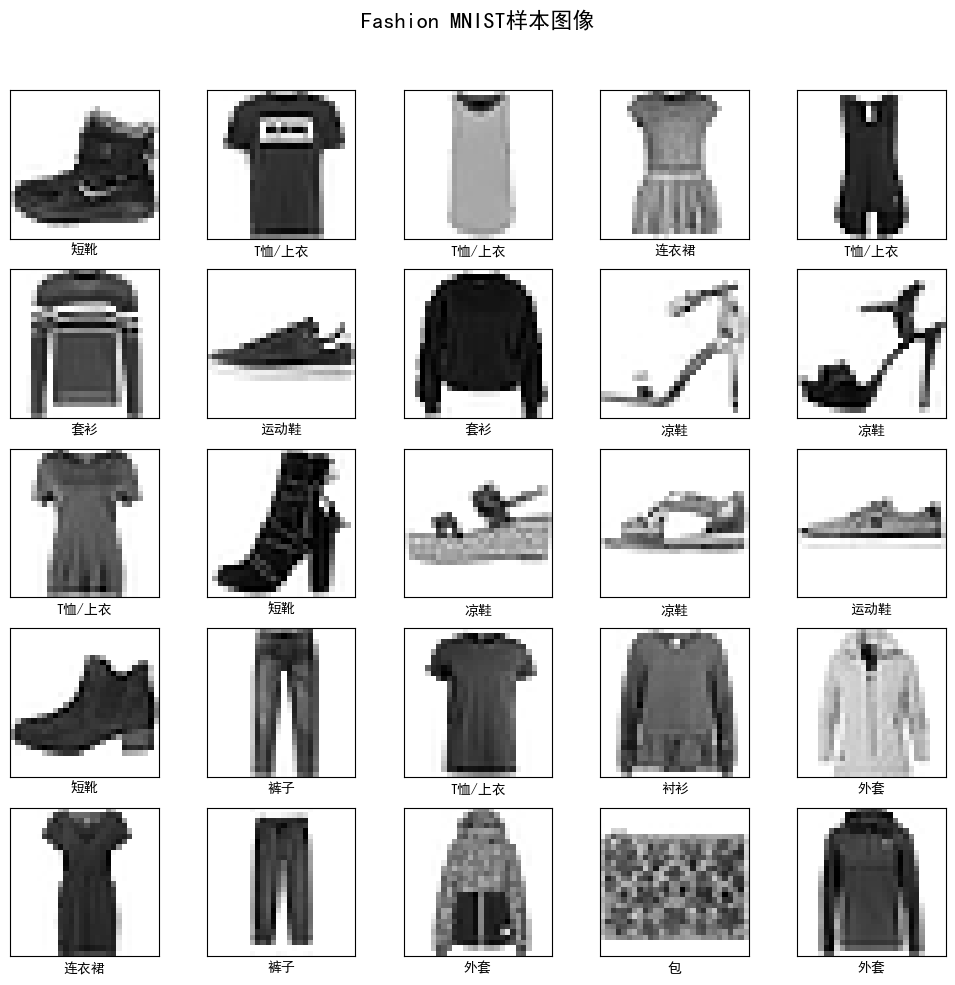

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.suptitle('Fashion MNIST样本图像', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

### 可视化训练集中各类别的样本数量分布

- 使用 Seaborn 的 `countplot` 统计训练集中每个类别样本的数量。
- `x=y_train` 表示按标签类别计数，`hue=y_train` 为了给不同类别上色，`palette='viridis'` 设置颜色风格，`legend=False` 不显示图例。
- 横轴为类别名称，旋转45度防止标签重叠。
- 纵轴为对应类别的样本数量。
- 该图有助于了解数据是否均衡，判断是否需要进行数据增强或采样处理。


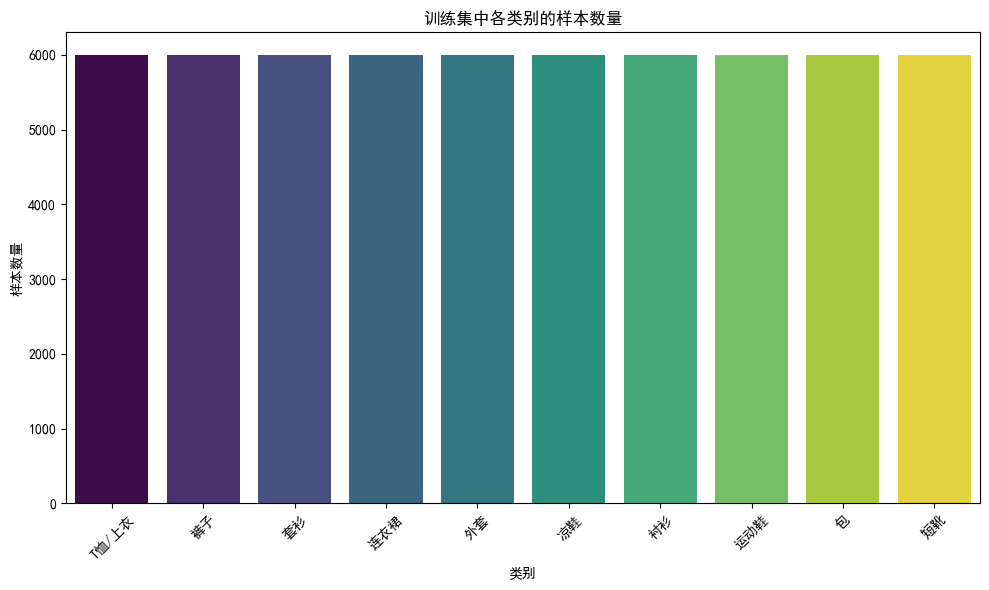

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, hue=y_train, palette='viridis', legend=False)
plt.title('训练集中各类别的样本数量')
plt.xlabel('类别')
plt.ylabel('样本数量')
plt.xticks(range(10), class_names, rotation=45)
plt.tight_layout()
plt.show()

### 归一化图像数据

将训练集和测试集的像素值从整数类型转换为浮点型，并归一化到 [0, 1] 范围：

- 原始图像像素值范围为 0 到 255。
- 通过除以 255.0，将像素值缩放到 0 到 1 之间，有助于提升模型训练的稳定性和收敛速度。
- 转换为 `float32` 类型，兼容深度学习框架的计算需求。


In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### 调整输入数据形状以适应卷积神经网络

将训练集和测试集的图像数据从 `(样本数, 28, 28)` 变形为 `(样本数, 28, 28, 1)`：

- 新增的最后一维表示图像的通道数（灰度图像通道数为1）。
- 这是卷积神经网络（CNN）输入的标准格式，便于模型正确处理图像数据。


In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### 将标签转换为独热编码（One-Hot Encoding）

使用 `to_categorical` 函数将训练集和测试集的标签转换为独热编码格式：

- 原始标签是整数类别（0-9）。
- 转换后标签为长度为10的向量，目标类别对应位置为1，其余为0。
- 独热编码格式是分类神经网络输出层常用的标签格式，有助于训练多分类模型。


In [12]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### 查看预处理后数据的形状

打印归一化并调整形状后的训练和测试数据维度：

- `X_train` 和 `X_test` 的形状应为 `(样本数, 28, 28, 1)`，符合卷积神经网络输入要求。
- `y_train_cat` 和 `y_test_cat` 的形状应为 `(样本数, 10)`，对应独热编码后的类别标签。
- 通过确认形状，确保数据预处理步骤正确无误。


In [13]:
print("预处理后的数据形状:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train_cat.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test_cat.shape}")

预处理后的数据形状:
X_train: (60000, 28, 28, 1)
y_train: (60000, 10)
X_test: (10000, 28, 28, 1)
y_test: (10000, 10)


### 构建卷积神经网络模型

使用 Keras 的 `Sequential` 模型构建一个用于图像分类的卷积神经网络（CNN），结构如下：

- **卷积层组1**：
  - 两个 `Conv2D` 卷积层，32 个 3×3 卷积核，激活函数为 ReLU，`padding='same'` 保持尺寸。
  - 一个 `MaxPooling2D` 池化层，池化窗口大小为 2×2，用于下采样。
  - 一个 `Dropout` 层，丢弃 25% 神经元，防止过拟合。

- **卷积层组2**：
  - 两个 `Conv2D` 卷积层，64 个 3×3 卷积核，激活函数为 ReLU。
  - 一个 `MaxPooling2D` 池化层，进一步缩小特征图尺寸。
  - 一个 `Dropout` 层，丢弃 25% 神经元。

- **全连接层**：
  - `Flatten` 层将多维特征展平为一维。
  - 一个包含 512 个神经元的全连接层，激活函数为 ReLU。
  - `Dropout` 层，丢弃 50% 神经元。
  - 输出层为 10 个神经元，使用 `softmax` 激活函数，输出对应 10 个类别的概率分布。


In [14]:
model = Sequential([
    # 卷积层组1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # 卷积层组2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # 全连接层
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10个类别的输出层
])

### 编译模型

配置模型的训练参数：

- 优化器（optimizer）：使用 `adam` 优化算法，适合大多数深度学习任务，能自适应调整学习率。
- 损失函数（loss）：采用 `categorical_crossentropy`，适用于多分类问题且标签为独热编码格式。
- 评估指标（metrics）：使用 `accuracy` 准确率来监控训练和验证过程中的模型表现。


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 显示模型结构

调用 `model.summary()` 方法打印模型的详细结构信息，包括：

- 各层的名称、类型及输出形状。
- 每层的参数数量。
- 总参数量及可训练参数量。


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

### 设置训练回调函数

- `EarlyStopping`：
  - 监控验证集的损失 `val_loss`。
  - 如果连续 10 个训练周期（epoch）验证损失没有改善，则提前停止训练。
  - `restore_best_weights=True` 表示停止后恢复验证集表现最好的模型权重，防止过拟合。

- `ModelCheckpoint`：
  - 监控验证集准确率 `val_accuracy`。
  - 仅保存验证准确率达到历史最高时的模型权重，文件名为 `best_fashion_mnist_cnn.h5`。
  - `mode='max'` 表示期望监控指标最大化。


In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_fashion_mnist_cnn.h5',
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   mode='max')

### 训练模型

使用 `model.fit()` 方法训练卷积神经网络，具体参数如下：

- `X_train`, `y_train_cat`：训练数据和对应的独热编码标签。
- `batch_size=128`：每批次处理 128 个样本。
- `epochs=20`：最多训练 20 个完整迭代周期。
- `validation_split=0.1`：从训练数据中划分 10% 用作验证集，监控模型在未见数据上的表现。
- `callbacks`：传入提前停止（`early_stopping`）和模型检查点（`model_checkpoint`）回调函数，自动管理训练过程。
- `verbose=1`：显示训练进度条和日志。

训练过程会自动保存验证准确率最高的模型，并在验证损失不再改善时提前停止，防止过拟合。


In [18]:
history = model.fit(X_train, y_train_cat,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)

Epoch 1/20
422/422 [==============================] - 35s 82ms/step - loss: 0.5227 - accuracy: 0.8073 - val_loss: 0.3140 - val_accuracy: 0.8822
Epoch 2/20
  2/422 [..............................] - ETA: 32s - loss: 0.3217 - accuracy: 0.8867

C:\ProgramData\anaconda3\envs\fashion_mnist\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 34s 81ms/step - loss: 0.3156 - accuracy: 0.8836 - val_loss: 0.2572 - val_accuracy: 0.9047
Epoch 3/20
422/422 [==============================] - 34s 81ms/step - loss: 0.2652 - accuracy: 0.9023 - val_loss: 0.2358 - val_accuracy: 0.9097
Epoch 4/20
422/422 [==============================] - 35s 82ms/step - loss: 0.2324 - accuracy: 0.9136 - val_loss: 0.2154 - val_accuracy: 0.9173
Epoch 5/20
422/422 [==============================] - 34s 81ms/step - loss: 0.2166 - accuracy: 0.9201 - val_loss: 0.2109 - val_accuracy: 0.9218
Epoch 6/20
422/422 [==============================] - 34s 82ms/step - loss: 0.2016 - accuracy: 0.9251 - val_loss: 0.1973 - val_accuracy: 0.9285
Epoch 7/20
422/422 [==============================] - 34s 81ms/step - loss: 0.1849 - accuracy: 0.9319 - val_loss: 0.1925 - val_accuracy: 0.9298
Epoch 8/20
422/422 [==============================] - 35s 83ms/step - loss: 0.1748 - accuracy: 0.9352 - val_loss: 0.1776 - val_accuracy: 0.9357
Epo

### 绘制训练过程中的准确率曲线

- 使用 `history.history` 中保存的训练和验证准确率数据绘制折线图。
- 横轴为训练轮数（Epoch）。
- 纵轴为准确率，展示模型在训练集和验证集上的表现变化。
- 通过对比训练和验证准确率曲线，可以评估模型是否存在过拟合或欠拟合。


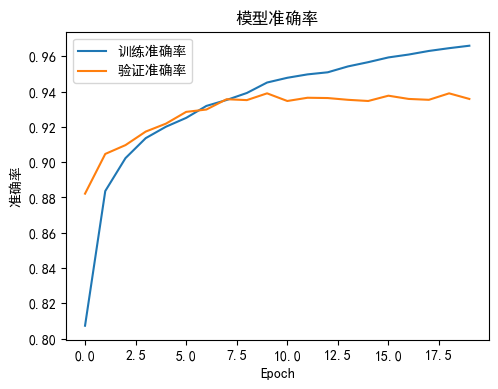

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()

### 绘制训练过程中的损失曲线

- 使用 `history.history` 中保存的训练和验证损失数据绘制折线图。
- 横轴为训练轮数（Epoch）。
- 纵轴为损失值，反映模型在训练集和验证集上的拟合程度。
- 通过观察训练和验证损失曲线，可以辅助判断模型是否过拟合或欠拟合。

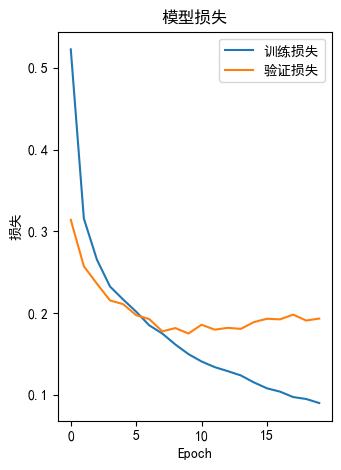

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()
plt.tight_layout()
plt.show()

### 在测试集上评估模型性能

- 使用 `model.evaluate()` 方法计算测试集上的损失和准确率。
- `X_test` 和 `y_test_cat` 是测试数据及其独热编码标签。
- `verbose=2` 使评估过程简洁输出。
- 打印测试集的最终准确率，衡量模型泛化能力。


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=2)
print(f'测试集准确率: {test_acc:.4f}')

313/313 - 2s - loss: 0.1927 - accuracy: 0.9318 - 2s/epoch - 7ms/step
测试集准确率: 0.9318


### 对测试集进行预测

- 使用训练好的模型对测试集 `X_test` 进行预测，得到每个样本对应的类别概率分布 `y_pred`。
- 使用 `np.argmax` 沿类别轴（axis=1）取最大概率值对应的索引，得到最终预测类别标签 `y_pred_classes`。


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 7ms/step


### 绘制混淆矩阵

- 使用 `confusion_matrix` 计算真实标签 `y_test` 与预测标签 `y_pred_classes` 之间的混淆矩阵。
- 利用 Seaborn 的 `heatmap` 函数绘制混淆矩阵的热力图，颜色深浅表示样本数量多少。
- 在图中显示每个类别的预测和真实样本数量，方便直观分析分类模型的表现和错误类型。
- 横轴为模型预测的类别标签，纵轴为真实类别标签，均使用之前定义的中文类别名称 `class_names`。


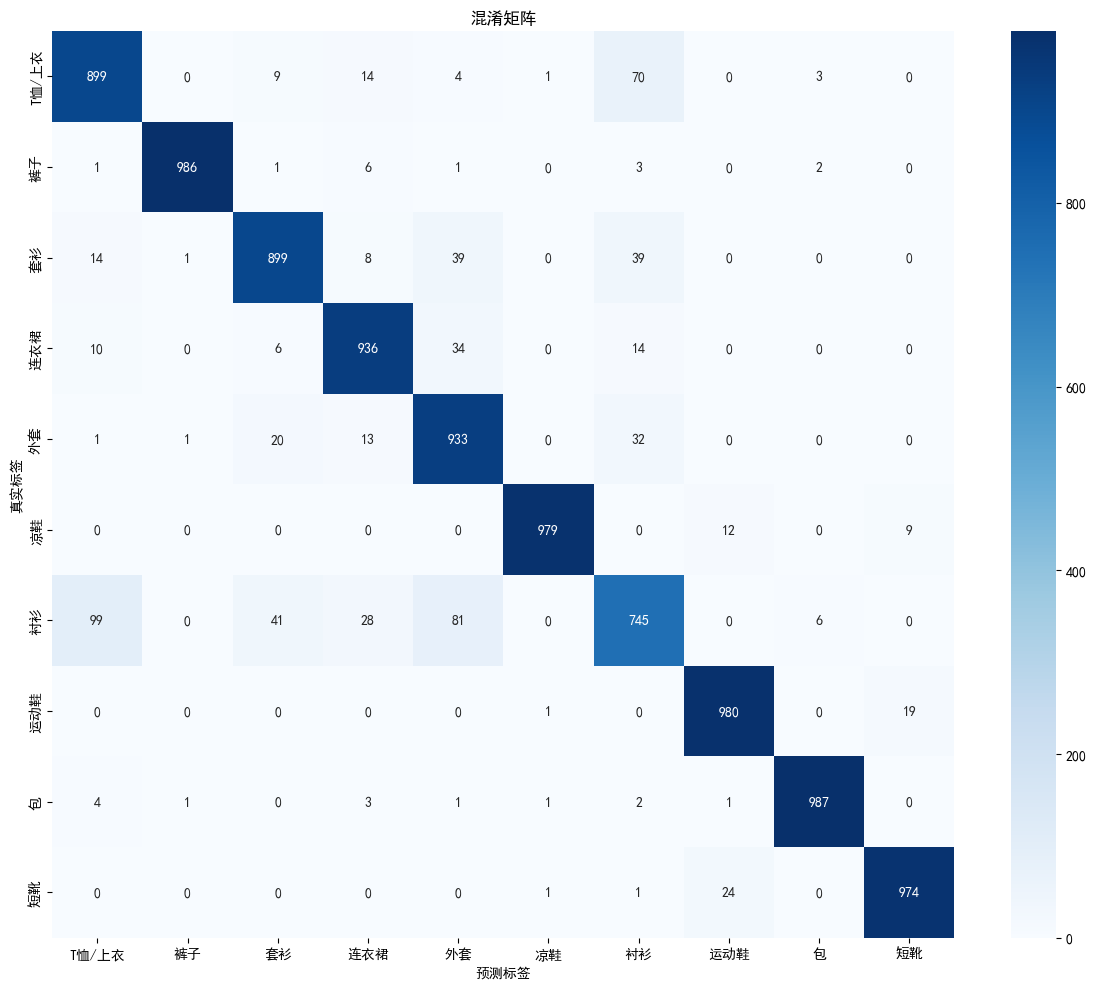

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.tight_layout()
plt.show()

### 输出分类报告

- 使用 `classification_report` 生成详细的分类性能指标报告。
- 报告包含每个类别的精确率（precision）、召回率（recall）、F1分数和支持度（support）。
- `target_names` 参数指定中文类别名称，方便结果阅读。


In [24]:
print("分类报告:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

分类报告:
              precision    recall  f1-score   support

       T恤/上衣       0.87      0.90      0.89      1000
          裤子       1.00      0.99      0.99      1000
          套衫       0.92      0.90      0.91      1000
         连衣裙       0.93      0.94      0.93      1000
          外套       0.85      0.93      0.89      1000
          凉鞋       1.00      0.98      0.99      1000
          衬衫       0.82      0.74      0.78      1000
         运动鞋       0.96      0.98      0.97      1000
           包       0.99      0.99      0.99      1000
          短靴       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### 找出并随机选取部分分类错误的样本

- 使用 `np.where` 找出预测类别与真实类别不一致的样本索引，即分类错误的样本。
- 设定最大显示数量为 25，避免展示过多。
- 使用 `np.random.choice` 从所有错误样本中随机选择若干索引，保证多样性且不重复。


In [25]:
misclassified_idx = np.where(y_pred_classes != y_test)[0]
n_samples = min(25, len(misclassified_idx))
random_idx = np.random.choice(misclassified_idx, n_samples, replace=False)

### 可视化部分错误分类的测试样本

- 随机选取部分分类错误的样本进行展示。
- 使用 `imshow` 显示每张 28×28 的灰度图像。
- 标题中用红色显示该样本的真实类别和模型预测类别，方便对比。
- 以 5×5 网格排列图像，清晰展示多个错误样本。


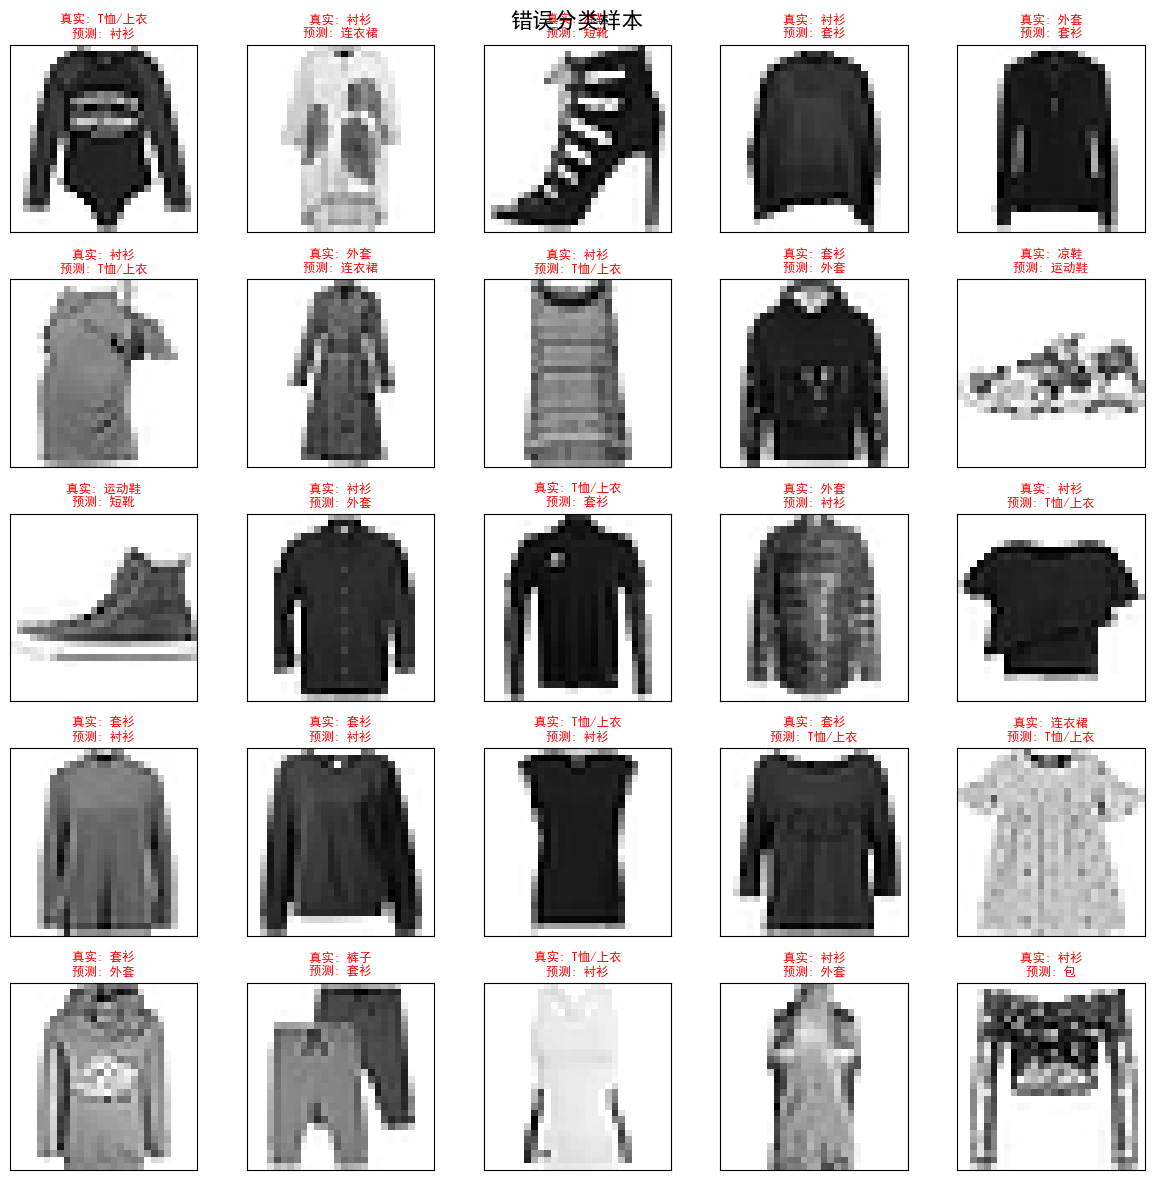

In [26]:
plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_idx):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f'''真实: {class_names[y_test[idx]]}
预测: {class_names[y_pred_classes[idx]]}''',
              color='red', fontsize=9)
plt.tight_layout()
plt.suptitle('错误分类样本', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

### 计算每个类别的准确率

- 初始化一个长度为10的数组 `class_accuracy`，用于存储每个类别的准确率。
- 对每个类别 `i`：
  - 找出测试集中真实标签为该类别的样本索引 `idx`。
  - 计算该类别样本中预测正确的比例，即准确率。
- 结果是一个包含每个类别分类准确率的数组，便于后续分析和比较。


In [27]:
class_accuracy = np.zeros(10)
for i in range(10):
    idx = (y_test == i)
    class_accuracy[i] = np.mean(y_pred_classes[idx] == y_test[idx])

### 可视化各类别准确率柱状图

- 使用条形图展示每个类别的分类准确率。
- 横轴为类别名称，标签旋转45度以防重叠。
- 纵轴为准确率，范围设为0到1。
- 在每个柱子上方显示对应的百分比数值，方便直观阅读。


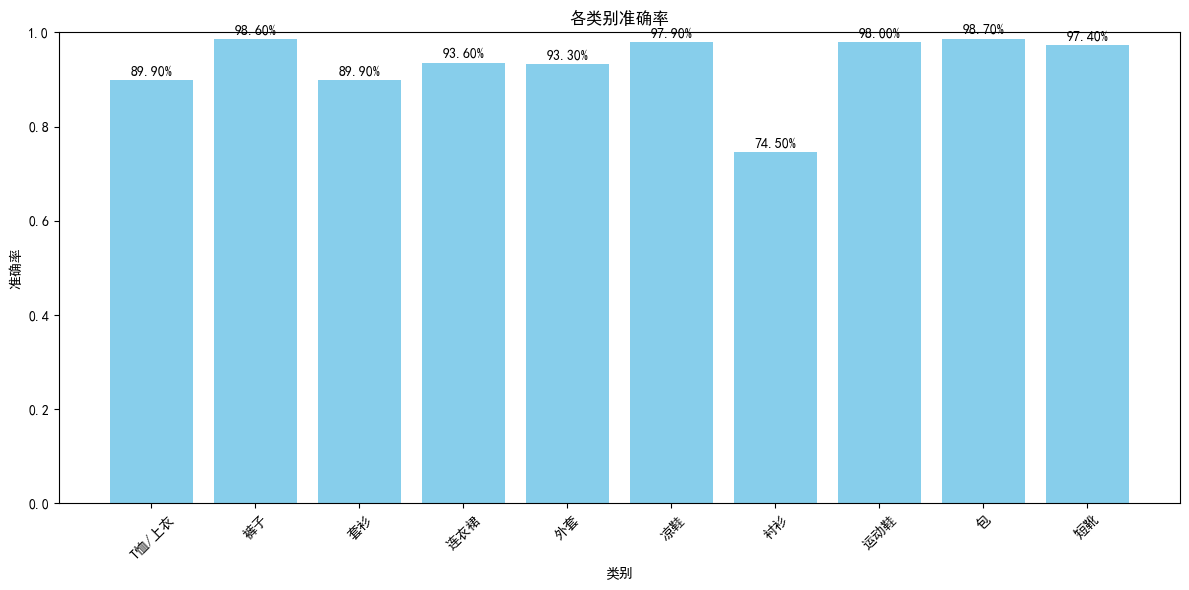

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(range(10), class_accuracy, color='skyblue')
plt.xticks(range(10), class_names, rotation=45)
plt.title('各类别准确率')
plt.xlabel('类别')
plt.ylabel('准确率')
plt.ylim(0, 1.0)
for i, v in enumerate(class_accuracy):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')
plt.tight_layout()
plt.show()

In [29]:
model.save('fashion_mnist_cnn_model.keras')
print("模型已保存为 'fashion_mnist_cnn_model.keras'")

模型已保存为 'fashion_mnist_cnn_model.keras'
